# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance
# 1 Regularized Linear Regression
## 1.1 Visualizing the dataset

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex5data1.mat')
print data.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [2]:
(X, Xtest, Xval, y, ytest, yval) = [data[key] for key
                                              in ('X', 'Xtest', 'Xval', 'y', 'ytest', 'yval')]
print X.shape, Xtest.shape, Xval.shape, y.shape, ytest.shape, yval.shape

(12, 1) (21, 1) (21, 1) (12, 1) (21, 1) (21, 1)


In [3]:
(y, ytest, yval) = (y[:,0], ytest[:,0], yval[:,0])

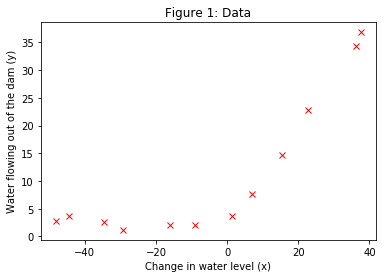

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(X, y, 'rx')
plt.title('Figure 1: Data')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## 1.2 Regularized linear regression cost function
$J(\theta) = \frac{1}{2m}(\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$

In [5]:
import numpy as np

def add_ones(X):
    m, _ = X.shape
    return np.column_stack((np.ones((m, 1)), X))
    
def cost(X, y, theta, lambda_):
    ### YOUR CODE HERE ###



    ######################
    
print cost(X, y, np.array([1, 1]), 1)  # should be about 303.993

303.99319222


## 1.3 Regularized linear regression gradient
$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) x_0^{(i)} \quad (j = 0)$

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j \quad (j \ge 1)$

In [6]:
def gradient(X, y, theta, lambda_):
    ### YOUR CODE HERE ###



    ######################

print gradient(X, y, np.array([1, 1]), 1)  # should be about [-15.30, 598.25]

[ -15.30301567  598.25074417]


## 1.4 Fitting linear regression

In [7]:
from scipy.optimize import fmin_cg

cost_ = lambda t: cost(X, y, t, 0)
gradient_ = lambda t: gradient(X, y, t, 0)
theta = fmin_cg(cost_, np.zeros(2), fprime=gradient_, maxiter=200)
print theta

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
[ 13.08790351   0.36777923]


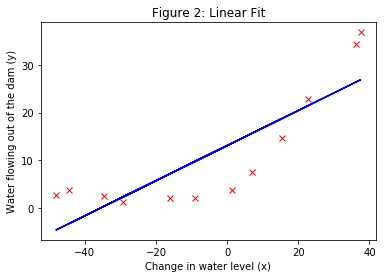

In [8]:
plt.plot(X, y, 'rx')
plt.plot(X, np.dot(add_ones(X), theta), 'b-')
plt.title('Figure 2: Linear Fit')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# 2 Bias-variance
## 2.1 Learning curves

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 20.098522
         Iterations: 18
         Function evaluations: 28
    

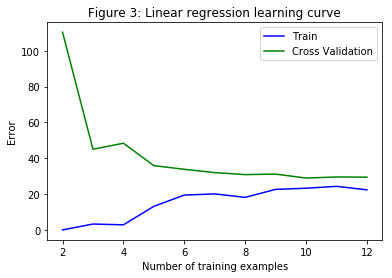

In [9]:
error_train = []
error_val = []
ns = range(2, 13)
for n in ns:
    ### YOUR CODE HERE ###




    ######################

plt.plot(ns, error_train, 'b-', label='Train')
plt.plot(ns, error_val, 'g-', label='Cross Validation')
plt.title('Figure 3: Linear regression learning curve')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='upper right')

# 3 Polynomial regression
$h_\theta (x) = \theta_0 + \theta_1 \cdot waterLevel + \theta_2 \cdot (waterLevel)^2 + \cdots + \theta_p \cdot (waterLevel)^p = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p$

In [10]:
def poly_features(X, p):
    ### YOUR CODE HERE ###


    ######################

print poly_features(X[:5, :], 3)

[[ -1.59367581e+01   2.53980260e+02  -4.04762197e+03]
 [ -2.91529792e+01   8.49896197e+02  -2.47770062e+04]
 [  3.61895486e+01   1.30968343e+03   4.73968522e+04]
 [  3.74921873e+01   1.40566411e+03   5.27014222e+04]
 [ -4.80588295e+01   2.30965109e+03  -1.10999128e+05]]


## 3.1 Learning Polynomial Regression

In [11]:
def feature_normalize(X):  # cf. ex1_multi
    ### YOUR CODE HERE ###



    ######################

In [12]:
p = 8
X_norm, mu, sigma = feature_normalize(poly_features(X, p))
print X_norm[:3, :]

[[ -3.78243704e-01  -7.88662325e-01   1.90328720e-01  -7.37591303e-01
    3.20251970e-01  -6.17151602e-01   3.59835014e-01  -5.31091256e-01]
 [ -8.38920100e-01   1.31420204e-03  -2.58961742e-01  -3.41564822e-01
    9.75492734e-02  -4.55196644e-01   2.66773432e-01  -4.68873807e-01]
 [  1.43871736e+00   6.10831582e-01   1.30534069e+00   2.56220001e-01
    1.02186338e+00  -1.26962121e-02   7.90210009e-01  -1.77926980e-01]]


In [13]:
cost_ = lambda t: cost(X_norm, y, t, 0)
gradient_ = lambda t: gradient(X_norm, y, t, 0)
theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)
print theta

         Current function value: 0.055373
         Iterations: 200
         Function evaluations: 371
         Gradient evaluations: 371
[ 11.21015339   9.94855392  18.28982053  17.73832991 -31.50040724
 -36.97675671  29.12704148  25.6145254   -5.58012449]


In [14]:
xs = np.array([np.linspace(-60, 60, 100)]).T
xs_poly = poly_features(xs, p)
xs_norm = (xs_poly - mu) / sigma

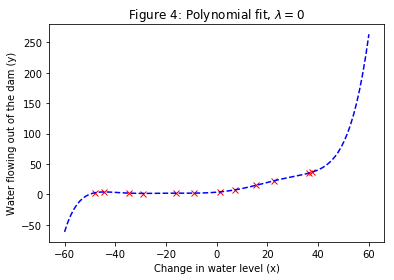

In [15]:
plt.plot(X, y, 'rx')
plt.plot(xs, np.dot(add_ones(xs_norm), theta), 'b--')
plt.title(r'Figure 4: Polynomial fit, $\lambda=0$')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 70
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 108
     

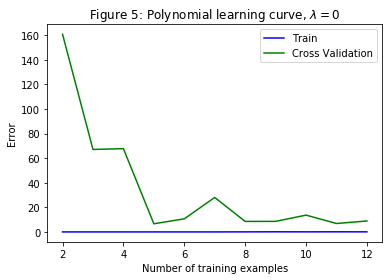

In [16]:
error_train = []
error_val = []
Xval_norm = (poly_features(Xval, p) - mu) / sigma
ns = range(2, 13)
for n in ns:
    cost_ = lambda t: cost(X_norm[:n,:], y[:n], t, 0)
    gradient_ = lambda t: gradient(X_norm[:n,:], y[:n], t, 0)
    theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)
    error_train.append(cost(X_norm[:n,:], y[:n], theta, 0))
    error_val.append(cost(Xval_norm, yval, theta, 0))

plt.plot(ns, error_train, 'b-', label='Train')
plt.plot(ns, error_val, 'g-', label='Cross Validation')
plt.title(r'Figure 5: Polynomial learning curve, $\lambda = 0$')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='upper right')

## 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62


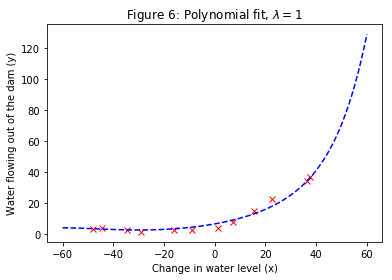

In [17]:
cost_ = lambda t: cost(X_norm, y, t, 1.0)
gradient_ = lambda t: gradient(X_norm, y, t, 1.0)
theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)

plt.plot(X, y, 'rx')
plt.plot(xs, np.dot(add_ones(xs_norm), theta), 'b--')
plt.title(r'Figure 6: Polynomial fit, $\lambda=1$')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 31
         Function evaluations: 52
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 8.754387
         Iterations: 32
         Function evaluations: 57


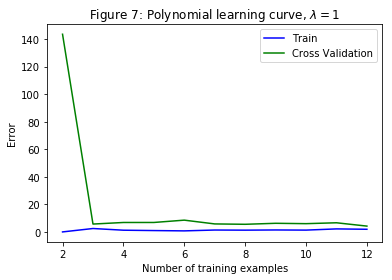

In [18]:
error_train = []
error_val = []
ns = range(2, 13)
for n in ns:
    cost_ = lambda t: cost(X_norm[:n,:], y[:n], t, 1.0)
    gradient_ = lambda t: gradient(X_norm[:n,:], y[:n], t, 1.0)
    theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)
    error_train.append(cost(X_norm[:n,:], y[:n], theta, 0))
    error_val.append(cost(Xval_norm, yval, theta, 0))

plt.plot(ns, error_train, 'b-', label='Train')
plt.plot(ns, error_val, 'g-', label='Cross Validation')
plt.title(r'Figure 7: Polynomial learning curve, $\lambda = 1$')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='upper right')

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17


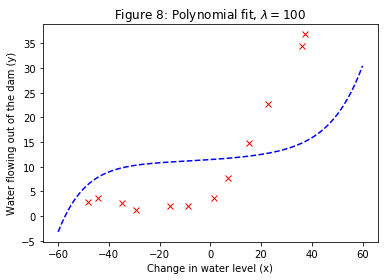

In [19]:
cost_ = lambda t: cost(X_norm, y, t, 100.0)
gradient_ = lambda t: gradient(X_norm, y, t, 100.0)
theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)

plt.plot(X, y, 'rx')
plt.plot(xs, np.dot(add_ones(xs_norm), theta), 'b--')
plt.title(r'Figure 8: Polynomial fit, $\lambda=100$')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## 3.3 Selecting $\lambda$ using a cross validation set

         Current function value: 0.055373
         Iterations: 200
         Function evaluations: 371
         Gradient evaluations: 371
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 111
         Function evaluations: 234
         Gradient evaluations: 234
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 144
         Function evaluations: 285
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 196
         Function evaluations: 359
         Gradient evaluations: 359
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 116
         Function evaluations: 210
         Gradient evaluations: 210
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 67
         Function evaluations: 128
         Gradient evalua

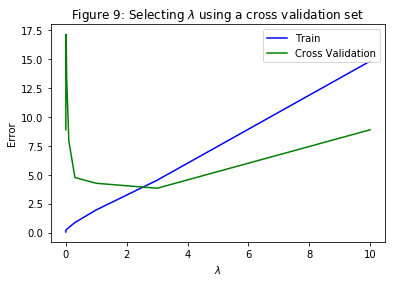

In [20]:
lambdas = (0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10)

error_train = []
error_val = []
for lambda_ in lambdas:
    ### YOUR CODE HERE ###




    ######################

plt.plot(lambdas, error_train, 'b-', label='Train')
plt.plot(lambdas, error_val, 'g-', label='Cross Validation')
plt.title(r'Figure 9: Selecting $\lambda$ using a cross validation set')
plt.xlabel(r'$\lambda$')
plt.ylabel('Error')
plt.legend(loc='upper right')

## 3.4 Optional (ungraded) exercise: Computing test set error

In [21]:
cost_ = lambda t: cost(X_norm, y, t, 3.0)
gradient_ = lambda t: gradient(X_norm, y, t, 3.0)
theta = fmin_cg(cost_, np.zeros(p + 1), fprime=gradient_, maxiter=200)

Xtest_norm = (poly_features(Xtest, p) - mu) / sigma
print cost(Xtest_norm, ytest, theta, 0)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
3.57202661971
